In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("bikebuyers.csv")
df.head()

,Unnamed: 0,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No


**Bar Chart example1**

In [2]:
df.shape

(1000, 20)

In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Marital Status', 'Gender', 'MaritalStatusNumeric',
       'GenderNumeric', 'Income', 'Children', 'EducationNumeric',
       'CommuteDistanceNumeric', 'Cars', 'Age', 'HomeOwnerNumeric',
       'PurchaseBikeNumeric', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike'],
      dtype='object')

In [4]:
df.dtypes

Unnamed: 0                 int64
ID                         int64
Marital Status            object
Gender                    object
MaritalStatusNumeric       int64
GenderNumeric              int64
Income                     int64
Children                   int64
EducationNumeric           int64
CommuteDistanceNumeric     int64
Cars                       int64
Age                        int64
HomeOwnerNumeric           int64
PurchaseBikeNumeric        int64
Education                 object
Occupation                object
Home Owner                object
Commute Distance          object
Region                    object
Purchased Bike            object
dtype: object

In [5]:
df.Education.unique()

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

In [6]:
df['Commute Distance'].unique()

array(['0-1 Miles', '10+ Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles'],
      dtype=object)

In [7]:
df['Home Owner'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df['Purchased Bike'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
#df['Education_rank'] = df['Education']
#df.Education_rank.replace(['Partial High School','High School','Partial College','Bachelors','Graduate Degree'],[1,2,3,4,5],inplace=True)
#df.Education_rank.astype('int64')

In [10]:
#df['Commute_rank'] = df['Commute Distance']
#df.Commute_rank.replace(['0-1 Miles','1-2 Miles','2-5 Miles','5-10 Miles','10+ Miles'],[0,1,2,5,10],inplace=True)
#df.astype({'Commute_rank':'int64'})

In [11]:
def clean_bikebuyers():
    import pandas as pd
    df = pd.read_csv("bikebuyers.csv")
    df['Education_rank'] = df['Education']
    df['Commute_rank'] = df['Commute Distance']
    df['Purchased_Bike'] = df['Purchased Bike']
    df.Education_rank.replace(['Partial High School','High School','Partial College','Bachelors','Graduate Degree'],[1,2,3,4,5],inplace=True)
    df.Commute_rank.replace(['0-1 Miles','1-2 Miles','2-5 Miles','5-10 Miles','10+ Miles'],[0,1,2,5,10],inplace=True)
    df.Purchased_Bike.replace(['Yes','No'],[0,1],inplace=True)
    df.Education_rank.astype('int64')
    df.astype({'Commute_rank':'int64'})
    df['Purchased_Bike'].astype('int64')
    return df

In [12]:
df = clean_bikebuyers()
df.dtypes

Unnamed: 0                 int64
ID                         int64
Marital Status            object
Gender                    object
MaritalStatusNumeric       int64
GenderNumeric              int64
Income                     int64
Children                   int64
EducationNumeric           int64
CommuteDistanceNumeric     int64
Cars                       int64
Age                        int64
HomeOwnerNumeric           int64
PurchaseBikeNumeric        int64
Education                 object
Occupation                object
Home Owner                object
Commute Distance          object
Region                    object
Purchased Bike            object
Education_rank             int64
Commute_rank               int64
Purchased_Bike             int64
dtype: object

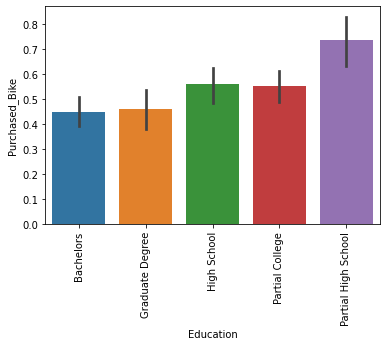

In [13]:
sns.barplot(x=df['Education'],y=df['Purchased_Bike']);
plt.xticks(rotation=90);

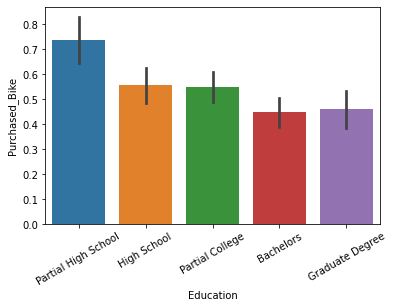

In [14]:
viz = sns.barplot(x=df['Education'],y=df['Purchased_Bike'],order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(),rotation=30);
#black tick marks on bar below bar chart represent an estimator of the amount of error in each one of these different groups, ie variance in purcahse bike


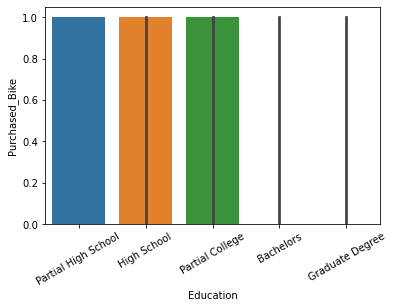

In [15]:
viz = sns.barplot(x=df['Education'],y=df['Purchased_Bike'],estimator = np.median,
                  order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(),rotation=30);
#By default estimator is mean
# median means in partial high school, high school, partial college number of 1 is more than 0, for Bachelors, Graduate num of 0 > num of 1

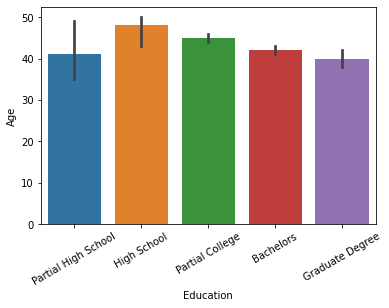

In [16]:
viz = sns.barplot(x=df['Education'],y=df['Age'],estimator = np.median,
                  order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(),rotation=30);

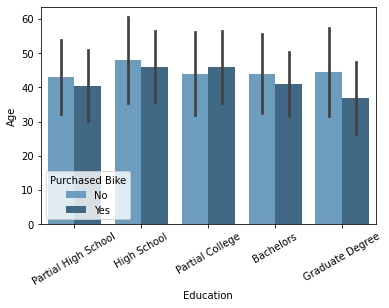

In [17]:
viz = sns.barplot(x=df['Education'],y=df['Age'],hue=df['Purchased Bike'],estimator = np.median, ci='sd',palette='Blues_d',
                  order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(),rotation=30);
#ci = Size of confidence intervals to draw around estimated values.

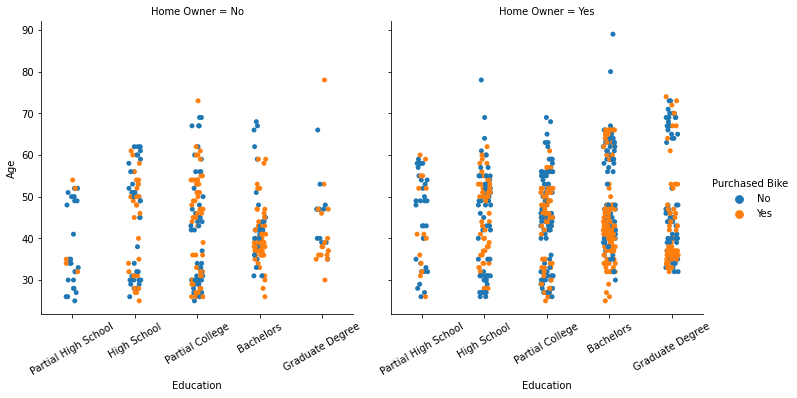

In [18]:
viz = sns.catplot(data=df,x='Education',y='Age',hue='Purchased Bike',col='Home Owner',estimator = np.median, ci='sd',
                  order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(rotation=30);

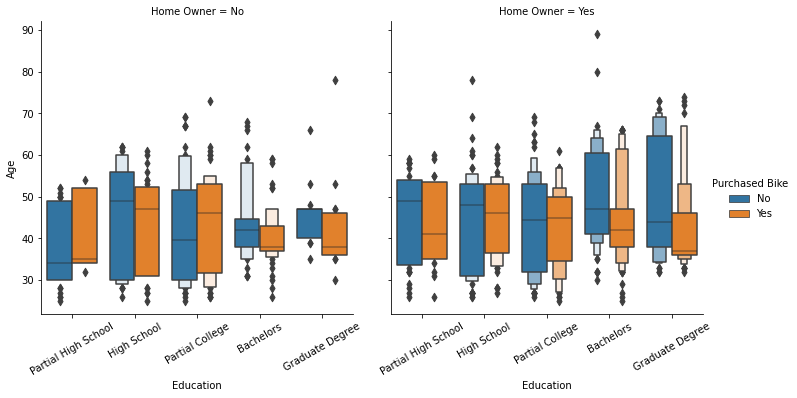

In [19]:
viz = sns.catplot(data=df,x='Education',y='Age',hue='Purchased Bike',col='Home Owner',estimator = np.median, ci='sd',kind='boxen',
                  order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(rotation=30);

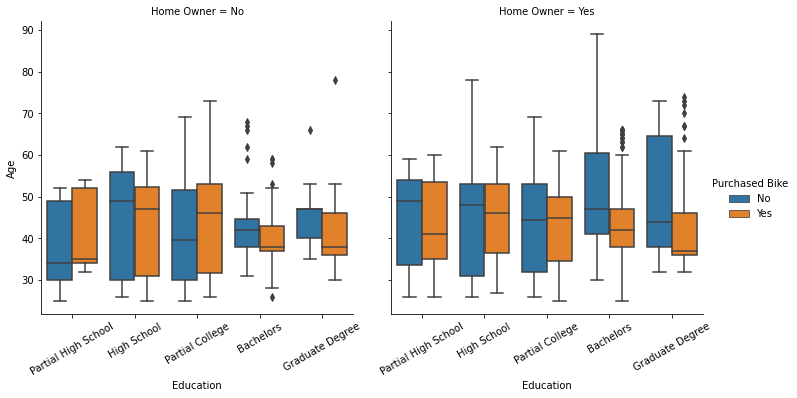

In [20]:
viz = sns.catplot(data=df,x='Education',y='Age',hue='Purchased Bike',col='Home Owner',estimator = np.median, ci='sd',kind='box',
                  order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(rotation=30);

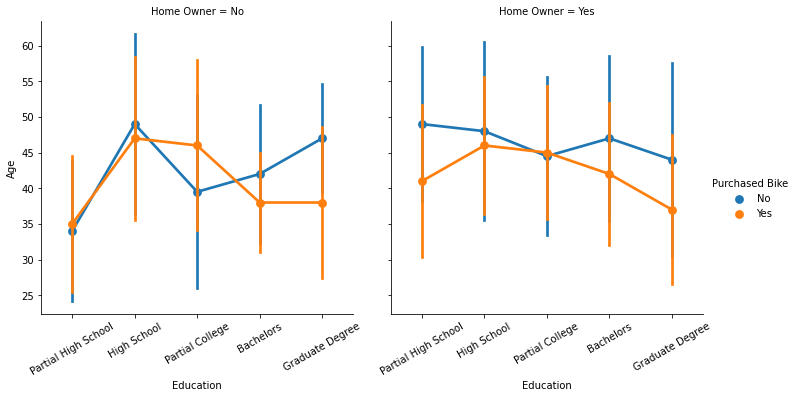

In [21]:
viz = sns.catplot(data=df,x='Education',y='Age',hue='Purchased Bike',col='Home Owner',estimator = np.median, ci='sd',kind='point',
                  order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(rotation=30);

C:\Users\Priya\Python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Priya\Python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


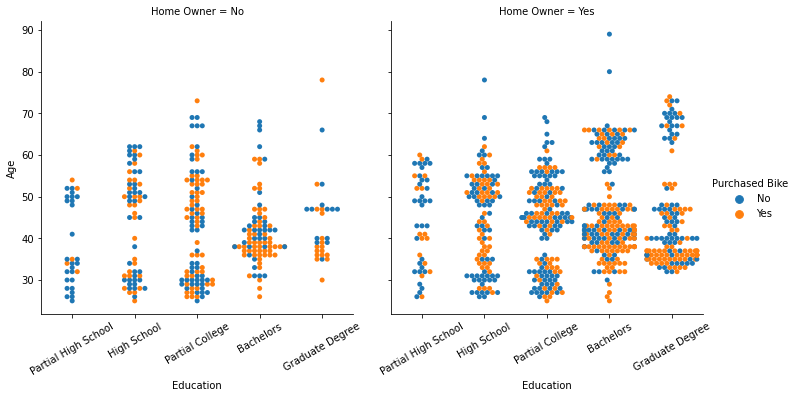

In [22]:
viz = sns.catplot(data=df,x='Education',y='Age',hue='Purchased Bike',col='Home Owner',estimator = np.median, ci='sd',kind='swarm',
                  order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(rotation=30);

In [57]:
from scipy import stats
import pandas as pd

groups = df['Education'].unique()
group_labels = []
for g in groups:
    group_labels.append(df[df['Education']==g]['Purchased_Bike'])
F,f_p = stats.f_oneway(*group_labels)
print('F: '+ str(round(F,4)))
print('f_p: '+ str(round(f_p,4)))

F: 6.4653
f_p: 0.0


In [58]:
r,r_p = stats.pearsonr(df['Education_rank'],df['Purchased_Bike'])
print('r: '+ str(round(r,4)))
print('r_p: '+ str(round(r_p,4)))

r: -0.1408
r_p: 0.0


In [59]:
partial_high_school = df[df.Education == 'Partial High School']
high_school = df[df.Education == 'High School']
t,t_p = stats.ttest_ind(partial_high_school['Purchased_Bike'],high_school['Purchased_Bike'])
print('t: '+ str(round(t,4)))
print('t_p: '+ str(round(t_p,4)))

t: 2.698
t_p: 0.0074


**tukeyhsd**

In [60]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['Purchased_Bike'],df['Education'])
print(mc.tukeyhsd())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1            group2       meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------
      Bachelors     Graduate Degree   0.0121    0.9 -0.1163 0.1404  False
      Bachelors         High School   0.1109 0.1206 -0.0162 0.2381  False
      Bachelors     Partial College   0.1032 0.0941 -0.0102 0.2166  False
      Bachelors Partial High School   0.2891  0.001  0.1159 0.4623   True
Graduate Degree         High School   0.0989 0.3296  -0.045 0.2428  False
Graduate Degree     Partial College   0.0912 0.3235 -0.0407  0.223  False
Graduate Degree Partial High School   0.2771  0.001  0.0913 0.4629   True
    High School     Partial College  -0.0077    0.9 -0.1385  0.123  False
    High School Partial High School   0.1782 0.0656 -0.0068 0.3632  False
Partial College Partial High School   0.1859 0.0322  0.0101 0.3617   True
--------------------------------------

**Bonferroni**

In [61]:
e_types = df.Education.unique()
e_types

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

In [63]:
for i,e in enumerate(e_types):
    print(i,'.',e)

0 . Bachelors
1 . Graduate Degree
2 . High School
3 . Partial College
4 . Partial High School


Significant t-tests below 0.005:


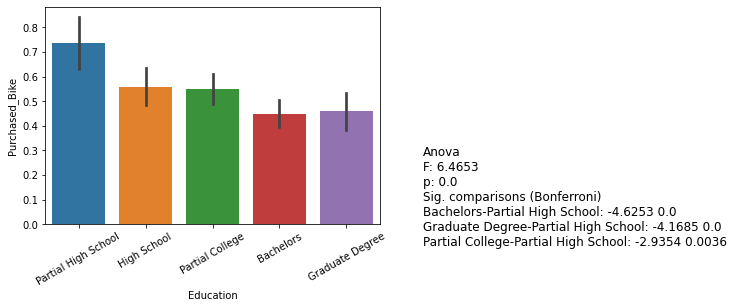

In [73]:
ttests = []

for i,e in enumerate(e_types):
    for i2,e2 in enumerate(e_types):
        #print(i,e,'--',i2,e2)
        if i2 > i:
            #print(e,e2)
            g1 = df[df.Education==e]['Purchased_Bike']
            g2 = df[df.Education==e2]['Purchased_Bike']
            t, p = stats.ttest_ind(g1,g2)
            ttests.append([f'{e}-{e2}:', t.round(4),p.round(4)])
            #print(f'{e}-{e2}:', t.round(4),p.round(4))
#print(ttests)      

textstr = f'Anova\n'
textstr += f'F: {F.round(4)}\n'
textstr += f'p: {f_p.round(4)}\n'
#print(textstr)
textstr += f'Sig. comparisons (Bonferroni)\n'

threshold = 0.05/len(ttests)
print(f'Significant t-tests below {threshold}:')
for t in ttests:
    if t[2] <= threshold:
        #print(t)
        textstr += f'{t[0]} {t[1]} {t[2]}\n'

viz = sns.barplot(x=df['Education'],y=df['Purchased_Bike'],order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(),rotation=30);
plt.text(1, 0, textstr, fontsize=12, transform=plt.gcf().transFigure);

**Bar Chart example2**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
df = pd.DataFrame({'Locations':['Atlanta','Los Angeles','New York City','Pheonix'],
                  'Q1 Sales':[1567811, 3391023, 3409871, 789123],
                  'Q2 Sales':[1981237, 3609877, 3100098, 810988],
                  'Q3 Sales':[1761231, 3509889, 3209876, 751233],
                  'Q4 Sales':[3578900, 6712333, 3378900, 1500092]})
df

,Locations,Q1 Sales,Q2 Sales,Q3 Sales,Q4 Sales
0,Atlanta,1567811,1981237,1761231,3578900
1,Los Angeles,3391023,3609877,3509889,6712333
2,New York City,3409871,3100098,3209876,3378900
3,Pheonix,789123,810988,751233,1500092


In [5]:
import numpy as np
#Create the positions for the bars
x = np.arange(len(df.Locations))
x

array([0, 1, 2, 3])

In [6]:
#Store the columns from the DataFrame and 'Flatten' them to appear as a regular python list structure
list_1 = df['Q1 Sales'].values.flatten()
list_2 = df['Q2 Sales'].values.flatten()
list_3 = df['Q3 Sales'].values.flatten()
list_4 = df['Q4 Sales'].values.flatten()

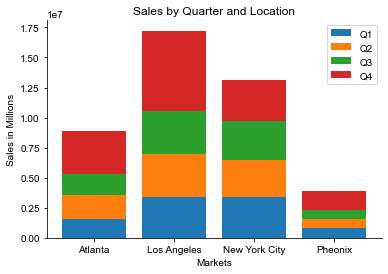

In [7]:
#Plot the bar plots
plt.bar(x,list_1,label='Q1')
plt.bar(x,list_2,bottom=list_1,label='Q2')
plt.bar(x,list_3,bottom=list_1+list_2,label='Q3')
plt.bar(x,list_4,bottom=list_1+list_2+list_3,label='Q4')

plt.xticks(x,df.Locations)
plt.legend(loc='upper right')
plt.xlabel('Markets')
plt.ylabel('Sales in Millions')
plt.title('Sales by Quarter and Location')

sns.set_style('white')
sns.set_context({'figure.figsize':(4,6)})
sns.despine(top=True,right=True)

plt.show()